1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

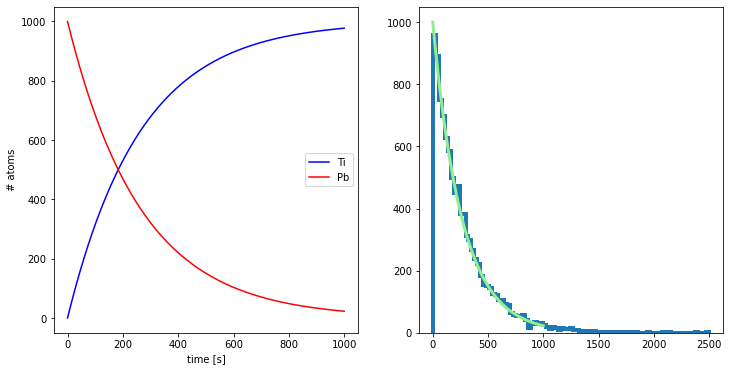

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

tau=3.052*60
N=1000

def p(t):
    return (1-2**(-t/tau))

def p_cdf(t):
    return 1.-2**(-t/tau)

def p_icdf(y):
    r = []
    for el in y:
        r.append(-tau*math.log(1-el, 2))
    return np.array(r)

t=np.linspace(0, 1000, 1000)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.plot(t, N*p(t), color='b', label='Ti')
ax1.plot(t, N*(1-p(t)),color='r',label='Pb')
ax1.set_xlabel('time [s]')
ax1.set_ylabel('# atoms')
ax1.legend()


atoms = np.random.random(10000)
decayed_atoms = p_icdf(atoms)
ax2.hist(decayed_atoms, histtype='step', bins='auto', density=False, linewidth=4)
ax2.plot(t, N*(1-p_cdf(t)), linewidth = 3, color = 'lightgreen')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

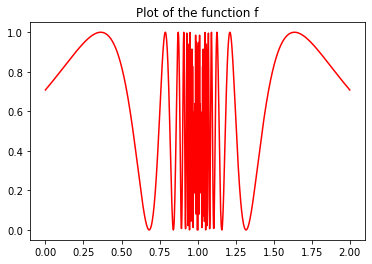

Integral result with hit/miss method : 1.3538
The mean is:  1.34752 
The standard deviation is:  0.00844876322309958 

Mean value method integral:  1.3399561971634282 
The error is:  0.020886428384606148 



In [2]:
def f(x):
    return (np.sin(1/(1-x)))**2

x = np.linspace(0,2, 1000)
plt.figure()
plt.plot(x,f(x), 'r')
plt.title('Plot of the function f')
plt.show()

hit = 0
def integrate():
    N = 10000
    hit=0

    for i in range(N):
        x=2*np.random.random() 
        y=np.random.random()
        if y<f(x): 
            hit = hit + 1
    I = 2*hit/N
    return I


print('Integral result with hit/miss method :', integrate())

#now evalutating the error estimation
I_2 = np.zeros(100)
for i in range(100):
    I_2[i] = integrate()
mean = np.mean(I_2)
std = np.std(I_2)
print('The mean is: ', mean, '\nThe standard deviation is: ', std, '\n')

#mean value method

x = np.zeros(N)
y = np.zeros(N)
for i in range(N):
    x[i] = 2*np.random.random()
    y[i] = f(x[i])

a = -1
b = 1

I_3 = ((b-a)*np.sum(y))/N
sigma = (b-a)*(math.sqrt(np.var(y))/math.sqrt(N))

print('Mean value method integral: ', I_3, '\nThe error is: ', sigma, '\n')

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
N=1000
s = 2
density = 0
for i in range(N): 
    x, y = (2*np.random.random()-1, 2*np.random.random()-1)
    if x**2+y**2<=1:
        density = density + 1
        
area = ((2**s)/N)*density
print('2 dimension value of the area: ',area)        
        
dim = 10
count2=0
v = 0
for i in range(N):
    s=0
    for j in range (dim):
        s+=((np.random.random())**2)
    if (s<=1):
        count2+=1;
v = (2**10)*(count2/N)

print('10D sphere: ',v)

2 dimension value of the area:  3.192
10D sphere:  3.072


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [4]:
def f(x):
    return ((x**(-1/2))/(np.exp(x) + 1))

def w(x):
    return (1/np.sqrt(x))

def integrate(x,a,b):
    return (2*math.sqrt(b) - 2*math.sqrt(a))

N = 100000
tot = []
for i in range(N):
    x = np.random.uniform(0,1) ** 2
    tot = np.append(tot, (f(x)/w(x)))

I = (sum(tot)/N)*integrate(x,0,1)
print('Value of the integral with importance samlping technique: ', I, '\n')

Value of the integral with importance samlping technique:  0.8392706285364608 

